In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'D:\vscode_files\python\notebooks\karpov_course\python\4_pivot_table\transaction_data.csv')
data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [6]:
data.describe(include='all')

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [37]:
trans_vc=data.transaction.value_counts()
trans_vc

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

In [38]:
trans_vc.sort_values()

transaction
error             4
cancelled      1619
successfull    3692
Name: count, dtype: int64

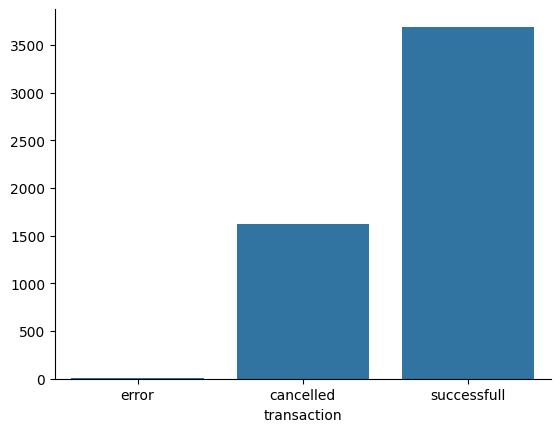

In [39]:
sns.barplot(x=trans_vc.index, y=trans_vc.values, 
            order=trans_vc.sort_values().index)
sns.despine()

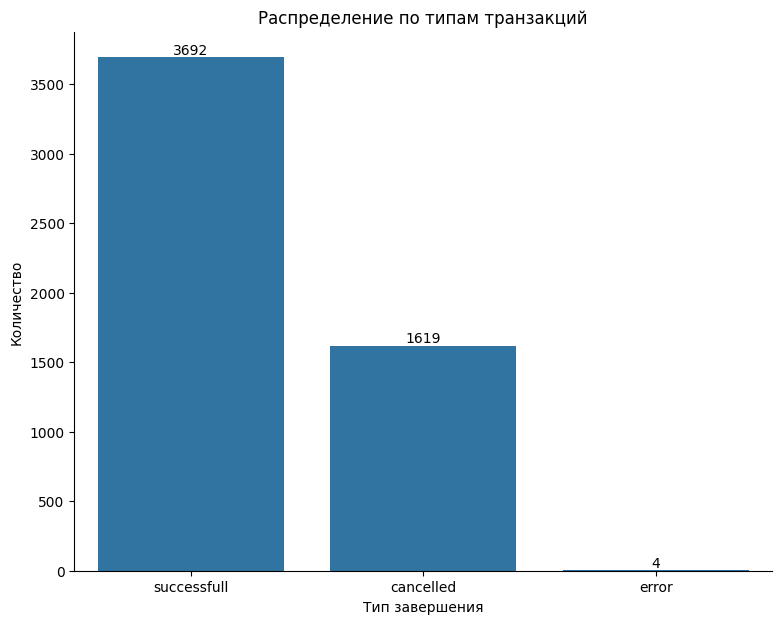

In [42]:
fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x=trans_vc.index, y=trans_vc.values)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0])
sns.despine()

In [43]:
trans_vc['error']

np.int64(4)

In [53]:
#data.query("transaction=='error'")
#data[data['transaction']=='error']
trans_vc['error']

np.int64(4)

In [76]:
success_per_user = data.loc[data.transaction == 'successfull'].groupby('name', as_index=False).size()
success_per_user.head()

,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68


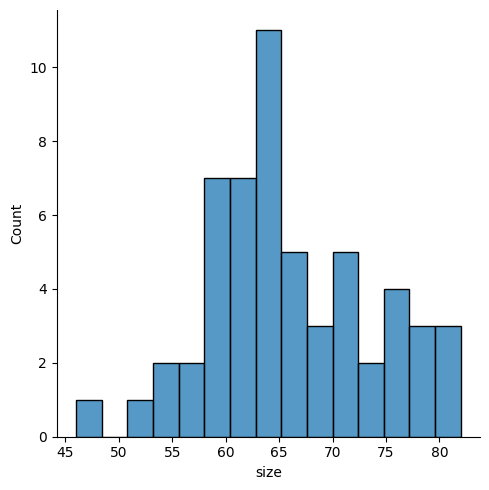

In [61]:
sns.displot(data=success_per_user, x='size', bins=15)
sns.despine()

In [77]:
success_per_user.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [78]:
success_per_user = data.query("transaction=='successfull'").transaction.value_counts()
success_per_user

transaction
successfull    3692
Name: count, dtype: int64

In [84]:
df=pd.read_csv(r'D:\vscode_files\python\notebooks\karpov_course\python\4_pivot_table\transaction_data_updated.csv',
               parse_dates=['date'])
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [83]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [87]:
pivot_trans_per_minute = df.pivot_table(index='minute', columns='name', values='transaction', aggfunc=['count'])
pivot_trans_per_minute.head()

count                                      \
name   Ekaterina_Fedorova Ekaterina_Ivanova Ekaterina_Lesnova   
minute                                                          
0                     3.0               4.0               2.0   
1                     4.0               4.0               NaN   
2                     1.0               2.0               4.0   
3                     3.0               NaN               2.0   
4                     3.0               NaN               NaN   

                                                                \
name   Ekaterina_Ozerova Ekaterina_Petrova Ekaterina_Polyanova   
minute                                                           
0                    3.0               4.0                 4.0   
1                    4.0               2.0                 5.0   
2                    4.0               2.0                 1.0   
3                    NaN               5.0                 2.0   
4                    3.0               1.0                 1.0   

                                                                      ...  \
name   Ekaterina_Smirnova Irina_Fedorova Irina_Ivanova Irina_Lesnova  ...   
minute                                                                ...   
0                     2.0            1.0           2.0           2.0  ...   
1                     4.0            4.0           4.0           3.0  ...   
2                     3.0            2.0           3.0           3.0  ...   
3                     1.0            3.0           2.0           2.0  ...   
4                     2.0            3.0           2.0           1.0  ...   

                                                              \
name   Svetlana_Petrova Svetlana_Polyanova Svetlana_Smirnova   
minute                                                         
0                   NaN                3.0               1.0   
1                   4.0                5.0               3.0   
2                   4.0                1.0               3.0   
3                   1.0                5.0               5.0   
4                   1.0                2.0               2.0   

                                                                             \
name   Vasilisa_Fedorova Vasilisa_Ivanova Vasilisa_Lesnova Vasilisa_Ozerova   
minute                                                                        
0                    1.0              4.0              1.0              3.0   
1                    2.0              3.0              3.0              NaN   
2                    3.0              NaN              1.0              2.0   
3                    2.0              4.0              NaN              3.0   
4                    1.0              1.0              2.0              2.0   

                                                              
name   Vasilisa_Petrova Vasilisa_Polyanova Vasilisa_Smirnova  
minute                                                        
0                   NaN                NaN               1.0  
1                   NaN                3.0               2.0  
2                   1.0                3.0               1.0  
3                   4.0                1.0               NaN  
4                   3.0                NaN               1.0  

[5 rows x 56 columns]

In [88]:
pivot_trans_per_minute = pivot_trans_per_minute.fillna(0)
pivot_trans_per_minute.head()

count                                      \
name   Ekaterina_Fedorova Ekaterina_Ivanova Ekaterina_Lesnova   
minute                                                          
0                     3.0               4.0               2.0   
1                     4.0               4.0               0.0   
2                     1.0               2.0               4.0   
3                     3.0               0.0               2.0   
4                     3.0               0.0               0.0   

                                                                \
name   Ekaterina_Ozerova Ekaterina_Petrova Ekaterina_Polyanova   
minute                                                           
0                    3.0               4.0                 4.0   
1                    4.0               2.0                 5.0   
2                    4.0               2.0                 1.0   
3                    0.0               5.0                 2.0   
4                    3.0               1.0                 1.0   

                                                                      ...  \
name   Ekaterina_Smirnova Irina_Fedorova Irina_Ivanova Irina_Lesnova  ...   
minute                                                                ...   
0                     2.0            1.0           2.0           2.0  ...   
1                     4.0            4.0           4.0           3.0  ...   
2                     3.0            2.0           3.0           3.0  ...   
3                     1.0            3.0           2.0           2.0  ...   
4                     2.0            3.0           2.0           1.0  ...   

                                                              \
name   Svetlana_Petrova Svetlana_Polyanova Svetlana_Smirnova   
minute                                                         
0                   0.0                3.0               1.0   
1                   4.0                5.0               3.0   
2                   4.0                1.0               3.0   
3                   1.0                5.0               5.0   
4                   1.0                2.0               2.0   

                                                                             \
name   Vasilisa_Fedorova Vasilisa_Ivanova Vasilisa_Lesnova Vasilisa_Ozerova   
minute                                                                        
0                    1.0              4.0              1.0              3.0   
1                    2.0              3.0              3.0              0.0   
2                    3.0              0.0              1.0              2.0   
3                    2.0              4.0              0.0              3.0   
4                    1.0              1.0              2.0              2.0   

                                                              
name   Vasilisa_Petrova Vasilisa_Polyanova Vasilisa_Smirnova  
minute                                                        
0                   0.0                0.0               1.0  
1                   0.0                3.0               2.0  
2                   1.0                3.0               1.0  
3                   4.0                1.0               0.0  
4                   3.0                0.0               1.0  

[5 rows x 56 columns]

In [93]:
minute_trans = pivot_trans_per_minute.sum(axis=1)
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

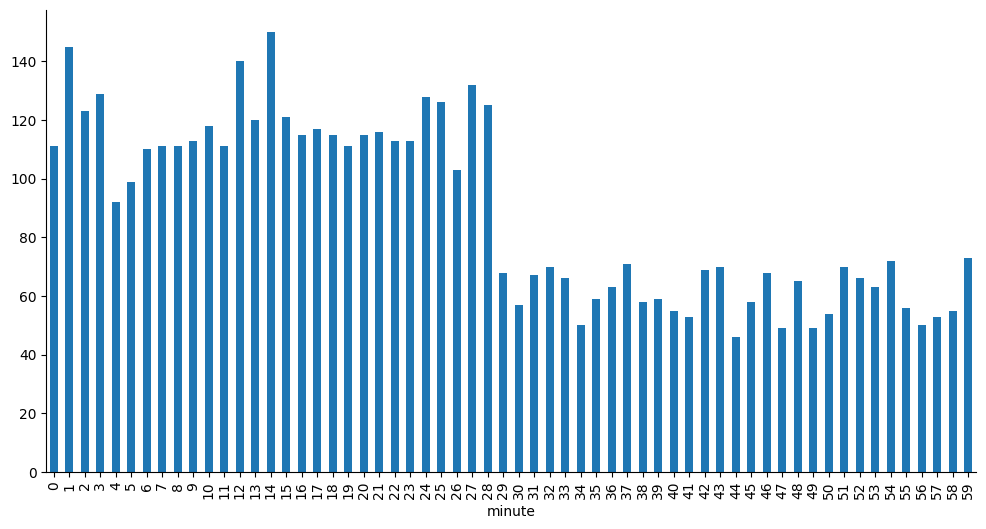

In [94]:
minute_trans.plot.bar(figsize=(12, 6))
sns.despine()

In [97]:
df.date.describe()

count                             5315
mean     2020-03-02 00:43:56.628974592
min                2020-03-02 00:00:00
25%         2020-03-02 00:21:50.500000
50%                2020-03-02 00:43:26
75%         2020-03-02 01:06:22.500000
max                2020-03-02 01:29:05
Name: date, dtype: object

In [98]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour * 60
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


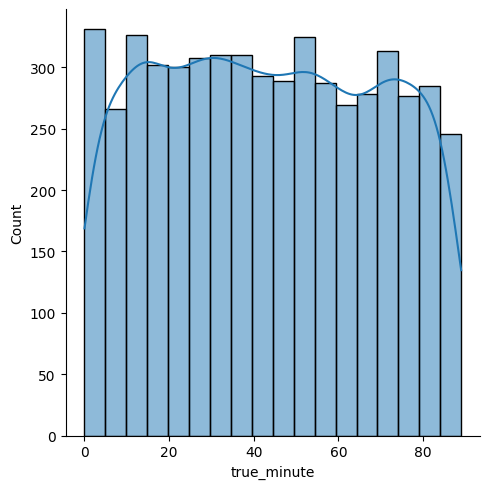

In [ ]:
sns.displot(data=df, x='true_minute', kde=True)
sns.despine()
#df.true_minute.hist()
#plt.xlabel('true_minute')
#plt.ylabel('count')